# Debugging the torch.distributions.Gamma sampler

2017-12-08

In [1]:
import torch
from torch.distributions import Gamma
import numpy as np
import scipy.stats
from matplotlib import pyplot
%matplotlib inline

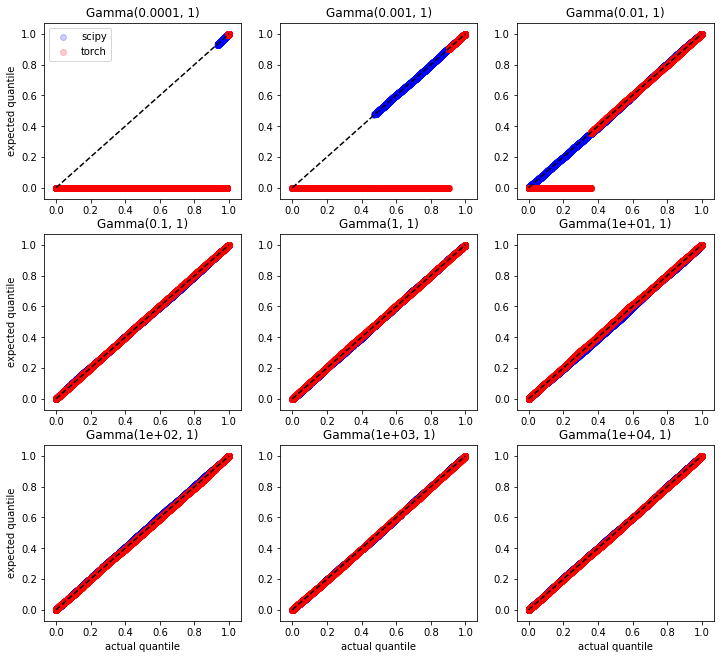

In [3]:
num_samples = 10000
fig, axes = pyplot.subplots(3, 3, figsize=(12,11))
fig.patch.set_facecolor('white')
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
ones = torch.ones(num_samples)
for i, (ax, alpha) in enumerate(zip(axes.reshape(-1), alphas)):
    x1 = Gamma(alpha * ones, ones).sample().numpy()
    x1.sort()
    x2 = scipy.stats.gamma.rvs(alpha * ones.numpy())
    x2.sort()
    X = np.arange(0.5, num_samples, 1.0) / num_samples
    ax.scatter(X, scipy.stats.gamma.cdf(x2, alpha), color='blue', alpha=0.2, label='scipy')
    ax.scatter(X, scipy.stats.gamma.cdf(x1, alpha), color='red', alpha=0.2, label='torch')
    ax.plot([0,1], [0,1], 'k--')
    if i == 0:
        ax.legend()
    if i % 3 == 0:
        ax.set_ylabel('expected quantile')
    if i >= 6:
        ax.set_xlabel('actual quantile')
    ax.set_title('Gamma({:0.1g}, 1)'.format(alpha))
pyplot.show()